# **Introduction**

В этом проекте walk through проблему машинного обучения, и попробуем to develop a model that can определить что сильнее всего влияет на расходы топлива, and then interpret the results. Это табличные данные и буду использовать регрессионную модель. Все описания данных приведены в Readme


Что будет в этом проекте:

1. Data cleaning and formatting
2. EDA
3. Feature engineering and selection
4. Establish a baseline and compare several machine learning models on a performance metric
5. Perform hyperparameter tuning on the best model to optimize it for the problem
6. Evaluate the best model on the testing set



 After all I interpret the model results to the extent possible








Весь проект будет поделен на 2 части. в первой мы почистим данные, eda и feature engineering. Во второй части мы будем обучать модель и интерпретировать результаты.

Let's start

# **Imports**

In [ ]:
# import library for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from scipy import stats
from scipy.stats import norm
import warnings

warnings.filterwarnings('ignore')

### *Load in the Data and Examine*

In [ ]:
# Load and read data
data = pd.read_csv('vehicles.csv')
data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,14.167143,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,27.046364,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,11.018889,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,27.046364,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,15.658421,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [ ]:
data.describe()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,45525.000000,45525.000000,45525.0,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,...,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000
mean,15.367278,0.189634,0.0,0.093243,18.953125,7.758234,0.829061,0.698859,0.000501,0.608982,...,24.043631,1.100113,35.155499,0.884697,2003.450412,-5330.422845,0.016112,0.264294,0.267150,0.264382
std,4.289698,0.976668,0.0,0.897977,9.683471,13.649170,6.376695,6.285864,0.037375,5.310647,...,13.787816,9.009790,12.876006,5.667478,12.112226,4474.185847,0.327983,3.726115,3.608891,3.649460
min,0.047081,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1984.000000,-39000.000000,0.000000,0.000000,0.000000,0.000000
25%,12.935217,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.506500,0.000000,28.000000,0.000000,1992.000000,-8000.000000,0.000000,0.000000,0.000000,0.000000
50%,14.875500,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.899500,0.000000,33.597000,0.000000,2004.000000,-5250.000000,0.000000,0.000000,0.000000,0.000000
75%,17.500588,0.000000,0.0,0.000000,21.000000,16.779000,0.000000,0.000000,0.000000,0.000000,...,26.300000,0.000000,39.700000,0.000000,2014.000000,-2500.000000,0.000000,0.000000,0.000000,0.000000
max,42.501429,16.528333,0.0,15.300000,150.000000,150.195800,145.000000,145.083500,5.350000,122.000000,...,224.800000,207.262200,187.100000,173.143600,2023.000000,8000.000000,9.600000,97.000000,81.000000,88.000000


Бросается в глаза, что у нас много пропущенных значений

Нам нужно предсказать экономию топлива, согласно описанию, в качестве target нам подходит колонка youSaveSpend, которая означает, сколько мы потратим (или сэкономим) за 5 лет использования машины с подхожящими характеристиками. Расмотрим target более подробно

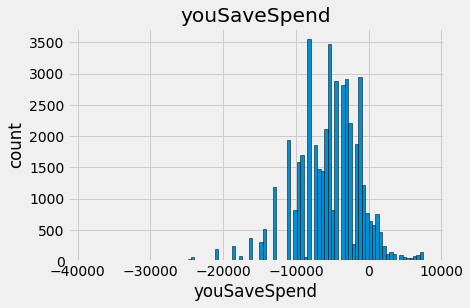

In [ ]:
plt.style.use('fivethirtyeight')
plt.hist(data['youSaveSpend'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('youSaveSpend'); plt.ylabel('count'); 
plt.title('youSaveSpend');

Выясним, какие признаки можно выделить из датасета.

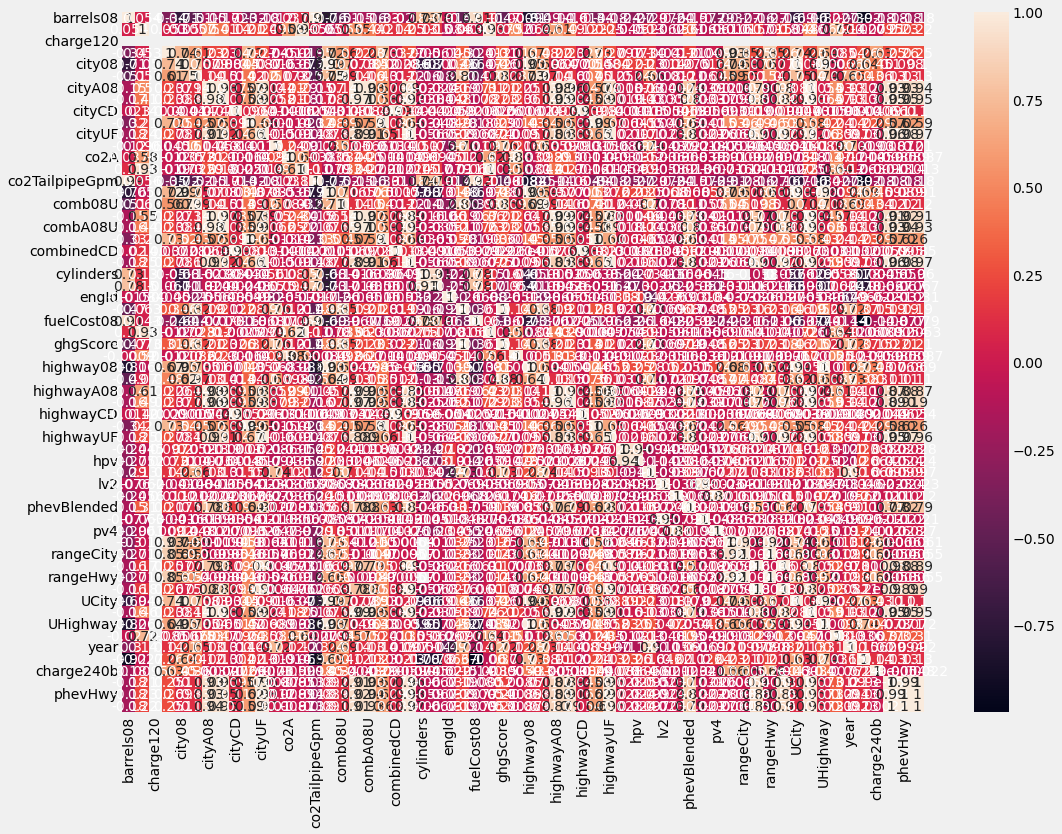

In [ ]:
#correlation matrix
corrmat =  data.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corrmat, annot=True, fmt='.2g')

Из этого мало что можно понять. Выведем признаки, которые коррелируют с таргетом больше чем 0.5

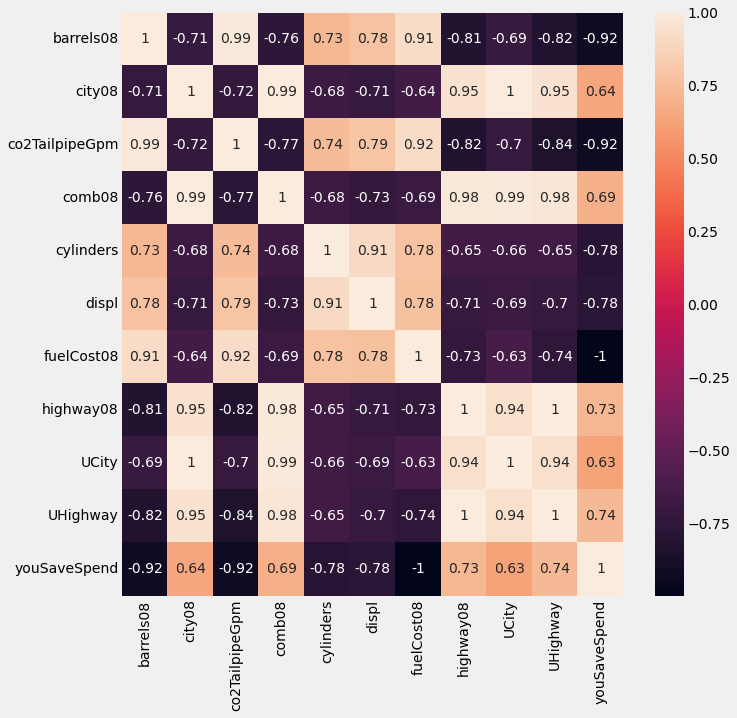

In [ ]:
# most correlated features

top_corr_features = corrmat.index[abs(corrmat['youSaveSpend'])>0.5]

plt.figure(figsize=(10,10))

sns.heatmap(data[top_corr_features].corr(), annot=True)


Так более понятно. Рассмотрим распределние

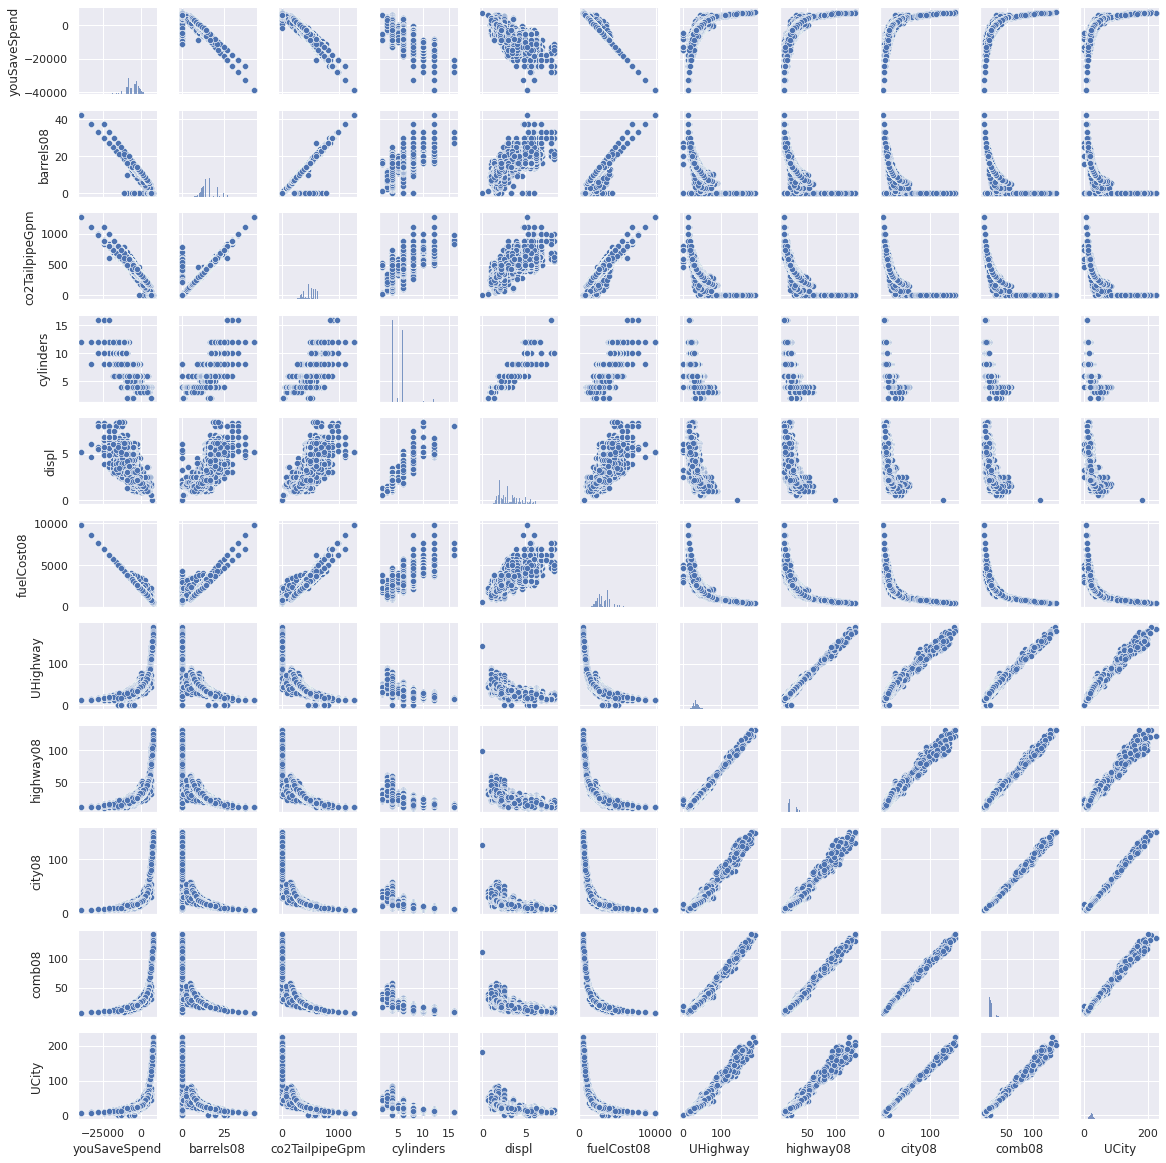

In [ ]:
#scatterplot
sns.set()
cols = ['youSaveSpend', 'barrels08', 'co2TailpipeGpm', 'cylinders', 'displ', 'fuelCost08', 'UHighway', 'highway08', 'city08', 'comb08', 'UCity']
sns.pairplot(data[cols], height = 1.5)
plt.show();

видно, что в даатсета много коррелирующих между собой признаков и один признак fuelCost имеет сильную корреляцию с таргетом. Посмотрим на корреляцию некоторых признаков

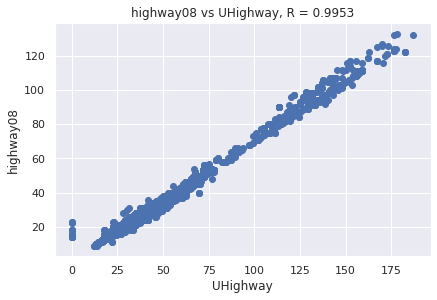

In [ ]:
plot_data = data[['highway08', 'UHighway']].dropna()

plt.plot(plot_data['UHighway'], plot_data['highway08'], 'bo')
plt.xlabel('UHighway'); plt.ylabel('highway08')
plt.title('highway08 vs UHighway, R = %0.4f' % np.corrcoef(data[['highway08', 'UHighway']].dropna(), rowvar=False)[0][1]);
                                                                     

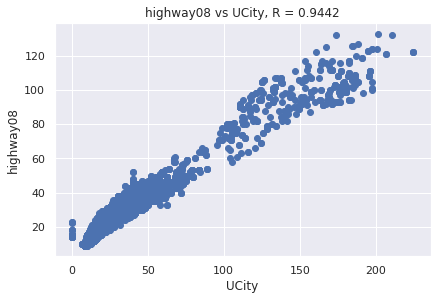

In [ ]:
plot_data = data[['highway08', 'UCity']].dropna()

plt.plot(plot_data['UCity'], plot_data['highway08'], 'bo')
plt.xlabel('UCity'); plt.ylabel('highway08')
plt.title('highway08 vs UCity, R = %0.4f' % np.corrcoef(data[['highway08', 'UCity']].dropna(), rowvar=False)[0][1]);

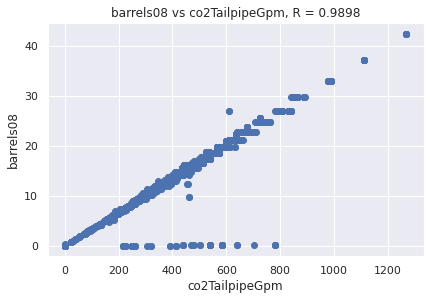

In [ ]:
plot_data = data[['barrels08', 'co2TailpipeGpm']].dropna()

plt.plot(plot_data['co2TailpipeGpm'], plot_data['barrels08'], 'bo')
plt.xlabel('co2TailpipeGpm'); plt.ylabel('barrels08')
plt.title('barrels08 vs co2TailpipeGpm, R = %0.4f' % np.corrcoef(data[['barrels08', 'co2TailpipeGpm']].dropna(), rowvar=False)[0][1]);

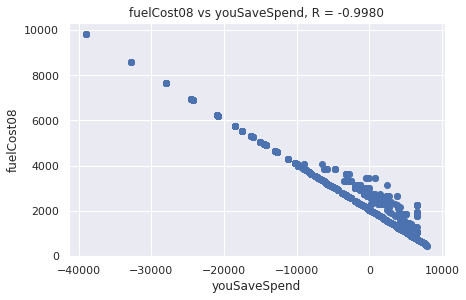

In [ ]:
plot_data = data[['fuelCost08', 'youSaveSpend']].dropna()

plt.plot(plot_data['youSaveSpend'], plot_data['fuelCost08'], 'bo')
plt.xlabel('youSaveSpend'); plt.ylabel('fuelCost08')
plt.title('fuelCost08 vs youSaveSpend, R = %0.4f' % np.corrcoef(data[['fuelCost08', 'youSaveSpend']].dropna(), rowvar=False)[0][1]);

Эти два признака слишком сильно коррелируют между собой. Оставим только один. FuelCost сильно коррелирует с таргетом, будем иметь это ввиду

Если посмотреть описание датасета, то есть есть такие данные как скорр, коробка передач и привод. Проверим важность признаков

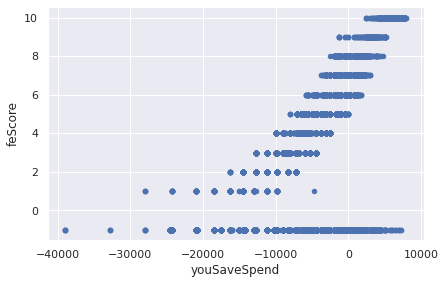

In [ ]:
data2 = pd.concat([data['feScore'], data['youSaveSpend']], axis=1)
data2.plot.scatter(x='youSaveSpend', y='feScore')

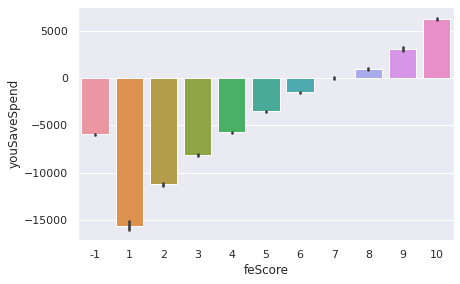

In [ ]:
sns.barplot(data.feScore, data.youSaveSpend)

Корреляция есть, но кажется слишком много значений -1. Согласно описанию это пропущенные значения. Обработмаем их и посмотрим процент пропущенных.

In [ ]:
data['feScore'].replace(-1, np.NaN, inplace=True)

mis_percent = int((100 * data['feScore'].isnull().sum() / len(data['feScore'])).round())
print(f'Процент пропущенных: {mis_percent}%')

Процент пропущенных: 70%


70 датасета пропущенно. Признак не принесет нам пользы

In [ ]:
data = data.drop(['feScore'], axis=1)

# **Проверим коробку передач и привод** 

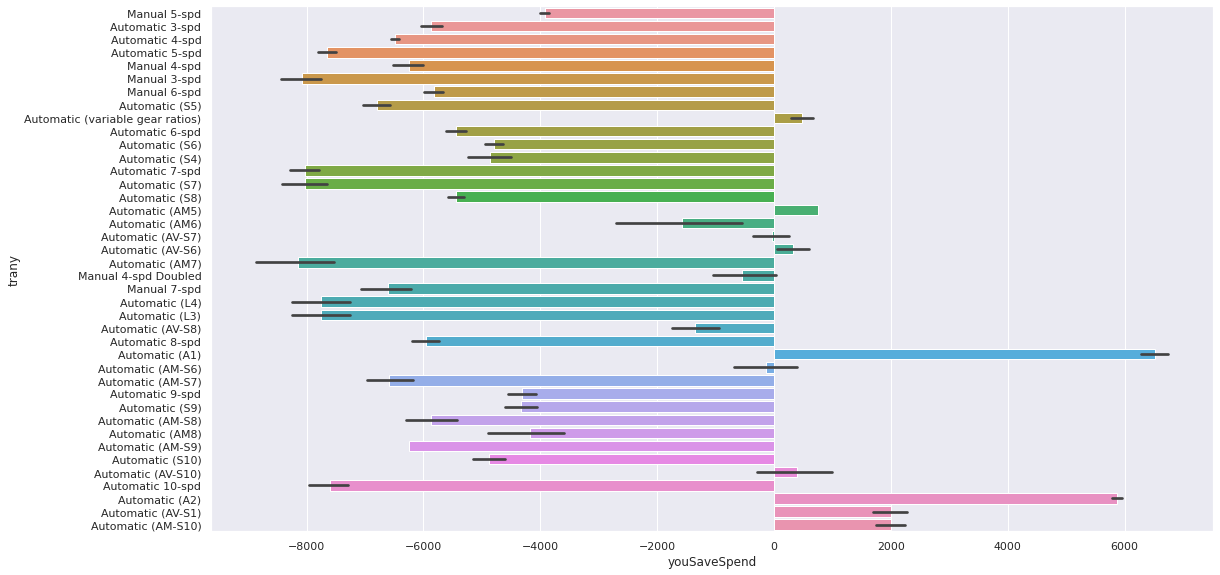

In [ ]:
sns.set()
plt.figure(figsize = (16,9))
sns.barplot(data.youSaveSpend, data.trany)

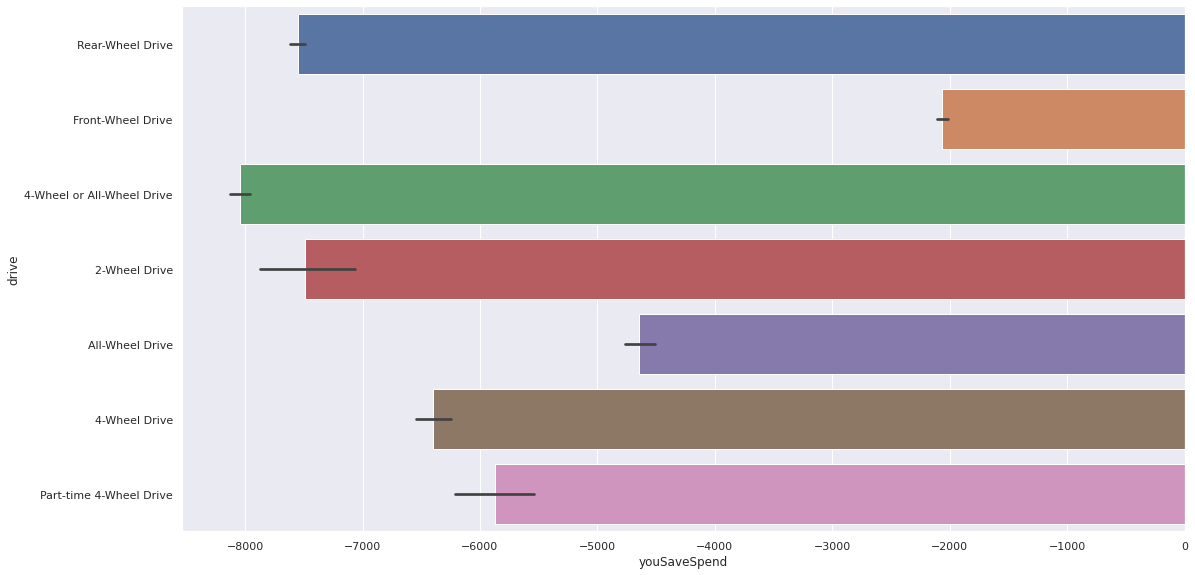

In [ ]:
sns.set()
plt.figure(figsize = (16,9))
sns.barplot(data.youSaveSpend, data.drive)

Видно, что коробка передач имеет значение и переднеприводные машины требуют меньше расхода. 

Посмотрим внимательнее на fuelCost, почему некоторые значения отличаются.

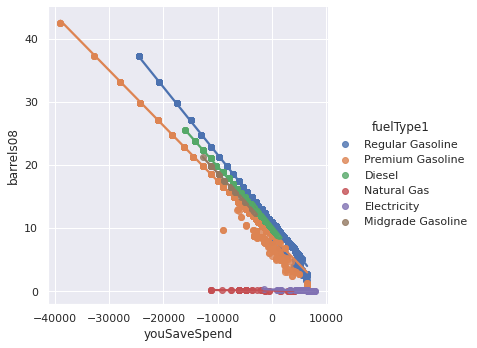

In [ ]:
sns.lmplot(x="youSaveSpend", y="barrels08", hue="fuelType1", data=data)

Электромашины потребляют мало топлива. Логично.





# **Feature Engineering and Selection**

Now that we have explored the trends and relationships within the data, we can work on engineering a set of features for our models. We can use the results of the EDA to inform this feature engineering. In particular, we learned the following from EDA which can help us in engineering/selecting features:


*   в датасете много данных, которые не помогают в определении таргета
*   у нас есть категориальные данные, которые могут быть полезны для модели







we will take the following steps for feature engineering:

* One-hot encode the categorical variables
* missing
* Add in the log transformation of the numerical variables







In [ ]:
# import encoder for encoding features
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

сделаем категоральные данные. Но у нас есть пропущенные значения. Важно их не трогать. Мы заменим их на медианные или моду позже

In [ ]:
data[['trany', 'drive', 'fuelType1']].isnull().sum()

trany          11
drive        1186
fuelType1       0
dtype: int64

In [ ]:
# сделаем кодирование, но в фичах *** мы не будем кодировать пропущенные значения
le = LabelEncoder()
 
df_raw = data[['trany', 'drive']]

df_temp = df_raw.astype("str").apply(LabelEncoder().fit_transform)
data[['trany', 'drive']] = df_temp.where(~df_raw.isna(), df_raw)

df_temp = df_raw.astype("category").apply(lambda x: x.cat.codes)
data[['trany', 'drive']] = df_temp.where(~df_raw.isna(), df_raw)

data['fuelType1'] = le.fit_transform(data['fuelType1'])


In [ ]:
# проверим, не изменились ли наши пропущенные значения
data[['trany', 'drive']].isnull().sum()

trany      11
drive    1186
dtype: int64

# **Missing value**

Теперь, когда мы кодировали данные, можно приступить к работе с пропущенными данными. 

Following is a function that calculates the number of missing values and the percentage of the total values that are missing for each column. I found it online in a Stack Overflow forum

In [ ]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [ ]:
missing_values_table(data)

Your selected dataframe has 82 columns.
There are 18 columns that have missing values.


,Missing Values,% of Total Values
c240bDscr,45400,99.7
c240Dscr,45394,99.7
sCharger,44548,97.9
evMotor,43866,96.4
rangeA,43720,96.0
fuelType2,43715,96.0
guzzler,42850,94.1
atvType,41025,90.1
tCharger,36208,79.5
startStop,31689,69.6


In [ ]:
# Get the columns with > 50% missing
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 82 columns.
There are 18 columns that have missing values.
We will remove 12 columns.


In [ ]:
# # Drop the columns
data = data.drop(columns = list(missing_columns))

Проверим, что у нас не осталось пропущенных значений в важных признаках

In [ ]:
data[['fuelCost08', 'barrels08', 'cylinders', 'displ', 'highway08', 'trany', 'drive', 'fuelType1']].isnull().sum()

fuelCost08       0
barrels08        0
cylinders      399
displ          397
highway08        0
trany           11
drive         1186
fuelType1        0
dtype: int64

заменим пропущенные значения медианной (в численных) и модой (в категориальных)

In [ ]:
# заменяем модой категориальные данные
data['trany'].fillna(int(data['trany'].mode()), inplace=True)
data['drive'].fillna(int(data['drive'].mode()), inplace=True)

In [ ]:
# заменим медианной числовые данные
data['cylinders'].fillna(data['cylinders'].median(), inplace=True)
data['displ'].fillna(data['displ'].median(), inplace=True)

In [ ]:
# проверим, что у нас не осталось пропущенных значений
data[['youSaveSpend', 'fuelCost08', 'barrels08', 'cylinders', 'displ', 'highway08', 'trany', 'drive', 'fuelType1']].isnull().sum()

youSaveSpend    0
fuelCost08      0
barrels08       0
cylinders       0
displ           0
highway08       0
trany           0
drive           0
fuelType1       0
dtype: int64

К сожалению, многие данные имеют такое:

Они совершенно бесполезны, поэтому чтобы не мучать нашу модель я удаляю их из датасета

In [ ]:
data['combE'].describe()

count    45525.000000
mean         0.619118
std          5.339497
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        121.000000
Name: combE, dtype: float64

In [ ]:
# drop unuseful and коллениарные features
data = data.drop(columns=['barrelsA08', 'charge120', 'charge240', 'city08', 'city08U', 'cityA08', 
                          'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2', 'co2A', 'co2TailpipeAGpm', 
                          'co2TailpipeGpm', 'comb08', 'comb08U', 'combA08', 'combA08U', 'combE', 
                          'combinedCD', 'combinedUF', 'engId', 'eng_dscr', 'fuelCostA08', 'ghgScore', 
                          'ghgScoreA', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD', 'highwayE', 
                          'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make', 'model', 'mpgData', 
                          'phevBlended', 'pv2', 'pv4', 'rangeCityA', 'rangeHwyA', 'UCity', 'UCityA', 
                          'UHighway', 'UHighwayA', 'VClass', 'year', 'charge240b', 'createdOn', 'modifiedOn', 
                          'phevCity', 'phevHwy', 'phevComb', 'fuelType', 'range', 'rangeCity', 'rangeHwy'])

In [ ]:
data.shape

(45525, 9)

У нас осталось только 8 признаков (одна из них целевая)

# **LOG!**

Чтобы облегчить работу модели, прологорифмуем данные, которые имеют большие числа

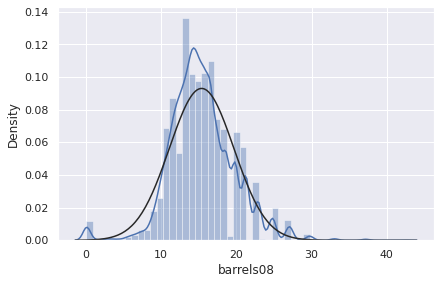

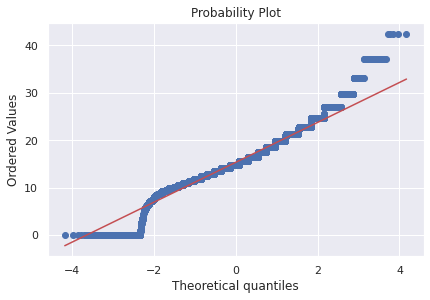

In [ ]:
#histogram and normal probability plot
sns.distplot(data['barrels08'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['barrels08'], plot=plt)

Существуют данные, которые близки к 0 и мешают для логарифма. Как мы увидели в eda это электрокары. Попробуем их отделить.

In [ ]:
data['NoEl'] = pd.Series(len(data['barrels08']), index=data.index)
data['NoEl'] = 0 
data.loc[data['barrels08']>1.1,'NoEl'] = 1

In [ ]:
data.loc[data['NoEl']==1,'barrels08'] = np.log(data['barrels08'])

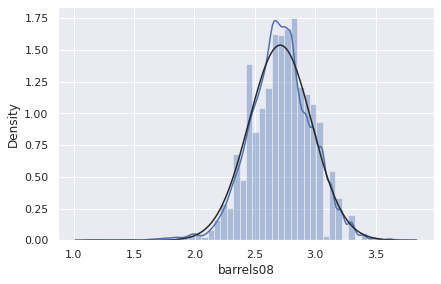

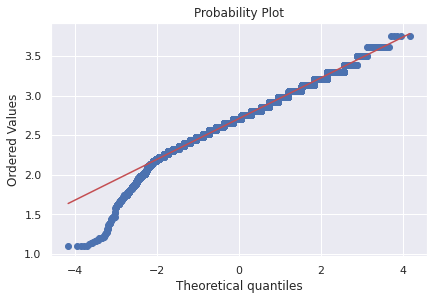

In [ ]:
sns.distplot(data[data['barrels08']>1.1]['barrels08'], fit=norm);
fig = plt.figure()
res = stats.probplot(data[data['barrels08']>1.1]['barrels08'], plot=plt)

In [ ]:
# remove временную feature
data = data.drop(['NoEl'], axis=1)

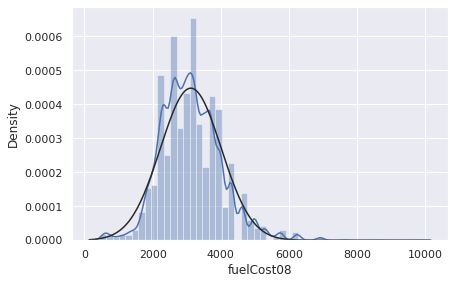

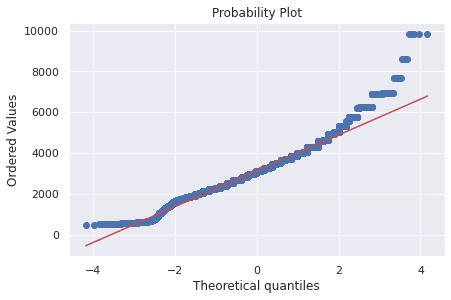

In [ ]:
sns.distplot(data['fuelCost08'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['fuelCost08'], plot=plt)

In [ ]:
data['fuelCost08'] = np.log(data['fuelCost08'])
data['highway08'] = np.log(data['highway08'])

In [ ]:
# посмотрим как выглядит наш dataframe
data.head()

,barrels08,cylinders,displ,drive,fuelCost08,fuelType1,highway08,trany,youSaveSpend
0,2.650925,4.0,2.0,6,7.882315,5,3.218876,37,-3000
1,3.297553,12.0,4.9,6,8.527144,5,2.639057,37,-15000
2,2.399611,4.0,2.2,4,7.625595,5,3.496508,37,0
3,3.297553,8.0,5.2,6,8.527144,5,2.484907,27,-15000
4,2.751009,4.0,2.2,2,8.202482,4,3.135494,37,-8000


In [ ]:
features = data.drop(columns='youSaveSpend')
targets = pd.DataFrame(data['youSaveSpend'])

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(31867, 8)
(13658, 8)
(31867, 1)
(13658, 1)


In [ ]:
# Save the no scores, training, and testing data
X.to_csv('training_features.csv', index = False)
X_test.to_csv('testing_features.csv', index = False)
y.to_csv('training_labels.csv', index = False)
y_test.to_csv('testing_labels.csv', index = False)

# **modelling**

In this series of notebooks, we are working on a supervised, regression machine learning problem. Using data, we want to predict какова экономия и какие факторы на это влияют.

В этом ноутбуке compare several machine learning models on a performance metric, perform hyperparameter tuning on the best model to optimize it for the problem, evaluate the best model on the testing set. 
And after all Interpret the model results to the extent possible




In [ ]:
# import Machine Learning Models, scaling values

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn import ensemble


# library for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

read data previous notebook

In [ ]:
# Read in data into dataframes 
train_features = pd.read_csv('training_features.csv')
test_features = pd.read_csv('testing_features.csv')
train_labels = pd.read_csv('training_labels.csv')
test_labels = pd.read_csv('testing_labels.csv')

# Display sizes of data
# print('Training Feature Size: ', train_features.shape)
# print('Testing Feature Size:  ', test_features.shape)
# print('Training Labels Size:  ', train_labels.shape)
# print('Testing Labels Size:   ', test_labels.shape)

Establish a Baseline

Чтобы понять, что машинное обучение подходит для решения этой задачи, мы установим базовый уровень. Если его не удасться превзойти,  то задача не может быть решена при помощи машинного обучения.

In [ ]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [ ]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of -5250.00
Baseline Performance on the test set: MAE = 3414.6288


### Scaling Features

features are in different units, and we want to normalize the features so the units do not affect the algorithm

In [ ]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)
scaler.fit(X_test)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [ ]:
# Convert y to one-dimensional array (vector)
y = np.array(y).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

# Models to Evaluate

We will compare 4 different machine learning models. 
To compare the models, we are going to be mostly using the defaults for the model hyperparameters. Позже we select the best performing model for further optimization using hyperparameter tuning.

In [ ]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [ ]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 606.7801


In [ ]:
ridge_reg = Ridge(alpha=0.1, random_state=42)
ridge_mae = fit_and_evaluate(ridge_reg)

print('Ridge Performance on the test set: MAE = %0.4f' % ridge_mae)

Ridge Performance on the test set: MAE = 607.1659


In [ ]:
lasso_reg = Lasso(alpha=0.1, random_state=42)
lasso_mae = fit_and_evaluate(lasso_reg)

print('Lasso Performance on the test set: MAE = %0.4f' % lasso_mae)

Lasso Performance on the test set: MAE = 607.0239


In [ ]:
gradient_boosted = GradientBoostingRegressor(random_state =42)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 15.3953


In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 174.6101


In [ ]:
xgb = XGBRegressor(booster='gbtree', objective='reg:squarederror')
xbd_mae = fit_and_evaluate(xgb)
print('xgb Performance on the test set: MAE = %0.4f' % xbd_mae)

xgb Performance on the test set: MAE = 19.7914


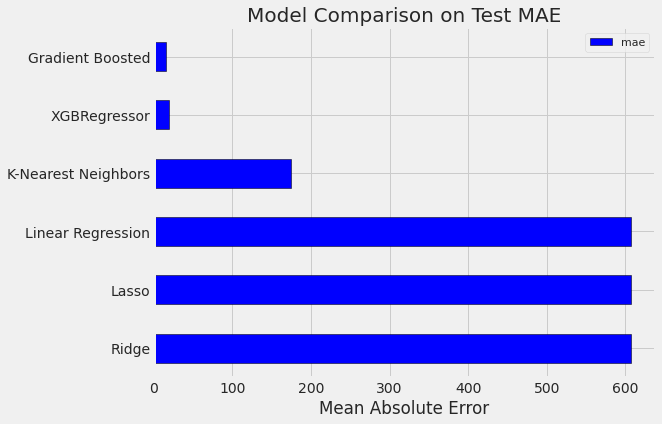

In [ ]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression',
                                            'Gradient Boosted',
                                            'K-Nearest Neighbors', 'XGBRegressor', 'Ridge', 'Lasso'],
                                 'mae': [lr_mae, 
                                         gradient_boosted_mae, knn_mae, xbd_mae, ridge_mae, lasso_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'blue', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

Мы видим, что лучшего всего работют модели на основе градиентного бустинга. Стандартный градиент работает медленнее xgb, так что в дальнейшем тюнингу подлежит xgb

## Hyperparameter Tuning with Random Search and Cross Validation

We can choose the best hyperparameters for a model through random search and cross validation. We selected 6 different hyperparameters to tune in the XGBregressor.


In [ ]:
param_lst = {
    'learning_rate' : [0.01, 0.1, 0.15, 0.3, 0.5],
    'n_estimators' : [100, 500, 1000, 2000, 3000],
    'max_depth' : [3, 6, 9],
    'min_child_weight' : [1, 5, 10, 20],
    'reg_alpha' : [0.001, 0.01, 0.1],
    'reg_lambda' : [0.001, 0.01, 0.1]
}

xgb_reg = RandomizedSearchCV(estimator = xgb, param_distributions = param_lst,
                              n_iter = 5, scoring = 'neg_mean_absolute_error',
                              cv = 4)
       
xgb_search = xgb_reg.fit(X, y)


In [ ]:
xgb_search.best_estimator_

XGBRegressor(learning_rate=0.5, n_estimators=500, objective='reg:squarederror',
             reg_alpha=0.001, reg_lambda=0.001)

## **Evaluate Final Model on the Test Set**

Мы получили лучшие параметры для нашего XGBRegressor, теперь протестируем эту модель на тестовых данных, которых она не видела ранее и  сравним их с дефолтной версией

In [ ]:
default_model = XGBRegressor(booster='gbtree', objective='reg:squarederror')

# Select the best model
final_model = xgb_search.best_estimator_

XGBRegressor(learning_rate=0.5, n_estimators=500, objective='reg:squarederror',
             reg_alpha=0.001, reg_lambda=0.001)

In [ ]:
default_model.fit(X, y)

XGBRegressor(objective='reg:squarederror')

In [ ]:
final_model.fit(X, y)

XGBRegressor(learning_rate=0.5, n_estimators=500, objective='reg:squarederror',
             reg_alpha=0.001, reg_lambda=0.001)

In [ ]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 19.7914.
Final model performance on the test set:   MAE = 2.0095.


Модель показала отличные результаты.

# **Interprete the Model**

Интерпретируем данные, которые мы получили от модели

In [ ]:
# Recreate Final Model
model_pred = final_model.predict(X_test)

print('Final Model Performance on the test set: MAE = %0.4f' % mae(y_test, model_pred))

Final Model Performance on the test set: MAE = 2.0095


In [ ]:
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(train_features.columns), 
                                'importance': final_model.feature_importances_})

# Show the most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(8)

,feature,importance
0,fuelCost08,0.976010
1,barrels08,0.018618
2,cylinders,0.002895
3,trany,0.001105
4,displ,0.000598
5,fuelType1,0.000497
6,drive,0.000178
7,highway08,0.000100


Здесь представлены признаки, которые сильнее всего позволяют нам predict таргет. Не удивительно, что fuelCost имеет значительное превосходство, посколько как мы выяснили выше в EDA эта фича очень сильно коррелирует с таргетом. 

In [ ]:
print('Коэффициэнт корреляции: %0.2f' % np.corrcoef(data[['fuelCost08', 'youSaveSpend']].dropna(), rowvar=False)[0][1]);

Коэффициэнт корреляции: -0.96


Для эксперемента попробуем выяснить, какие признаки важнее всего если убрать fuelCost

In [ ]:
# delete FuelCost08
X_w = train_features.drop(['fuelCost08'], axis=1)
X_test_w = test_features.drop(['fuelCost08'], axis=1)
final_model.fit(X_w, y)
final_pred_w = final_model.predict(X_test_w)
print('Final model performance on the test set without FuelCOst:   MAE = %0.4f.' % mae(y_test, final_pred_w))

Final model performance on the test set without FuelCOst:   MAE = 7.8156.


In [ ]:
# Show the most important without FuelCost
feature_results_without_FuelCost = pd.DataFrame({'feature': list(X_w.columns), 
                                'importance': final_model.feature_importances_})

feature_results_without_FuelCost = feature_results_without_FuelCost.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results_without_FuelCost.head(7)

,feature,importance
0,barrels08,0.545398
1,fuelType1,0.401621
2,highway08,0.031387
3,trany,0.012844
4,cylinders,0.006894
5,displ,0.001747
6,drive,0.000109


# **Make Conclusions and Document Findings**

В заключении кратко напишу, что мы выяснили из проекта:

* Using the given fuel economy data, a machine learning model can predict the fuel economy within 7 points.
* The most important variables for determining the Fuel Economy Score are the fuelCost08, barrels08, and fuelType1
